ParkName         0
ParkId           0
FacilityName     0
FacilityId       0
UnitName         0
UseType          0
UnitSpec         0
IsAda            0
IsTentSite       0
IsRvSite         0
VehicleLength    0
UnitType         0
ArrivalDate      0
dtype: int64
                 ParkName  ParkId                        FacilityName  \
0  Anza-Borrego Desert SP       2  Borrego Palm Canyon (sites 90-120)   
1  Anza-Borrego Desert SP       2  Borrego Palm Canyon (sites 90-120)   
2  Anza-Borrego Desert SP       2  Borrego Palm Canyon (sites 90-120)   
3  Anza-Borrego Desert SP       2  Borrego Palm Canyon (sites 90-120)   
4  Anza-Borrego Desert SP       2  Borrego Palm Canyon (sites 90-120)   

   FacilityId UnitName  UseType  UnitSpec  IsAda  IsTentSite  IsRvSite  \
0         777      103  Nightly  Campsite  False        True      True   
1         777      103  Nightly  Campsite  False        True      True   
2         777      103  Nightly  Campsite  False        True      True   
3    

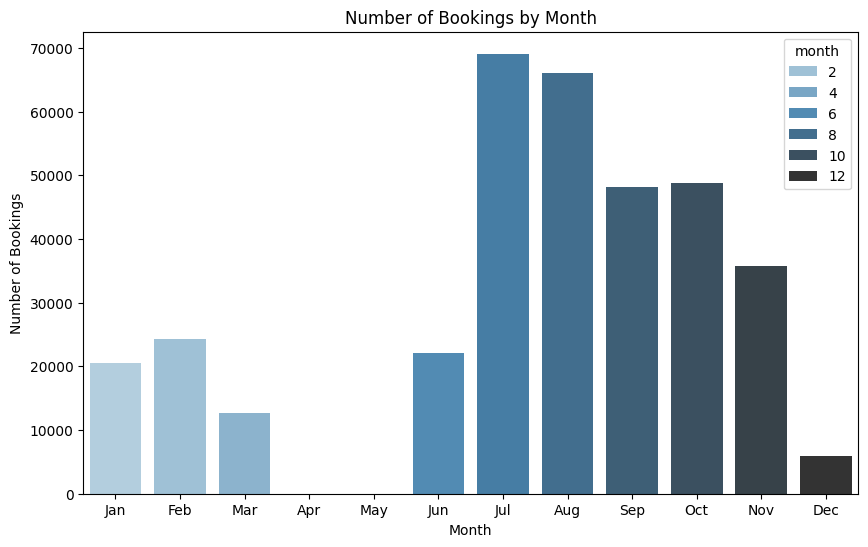

In [15]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/dylanfunk/Desktop/Python Project/Camping Project/dpr_camping_reservations_2020.csv')

# Check for missing values
print(df.isnull().sum())

# Clean and preprocess the data
df['ArrivalDate'] = pd.to_datetime(df['ArrivalDate'], errors='coerce')  # Convert ArrivalDate to datetime format, handling errors
df['month'] = df['ArrivalDate'].dt.month  # Extract month from the ArrivalDate

# Check the first few rows to confirm preprocessing
print(df.head())

# Fill missing values in categorical columns with a placeholder (if any)
df['FacilityName'] = df['FacilityName'].fillna('Unknown')

# Check the basic statistics of the data
print(df.describe())

# Visualize the number of bookings by month
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the number of bookings by month
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the number of bookings by month with hue
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='month', hue='month', palette='Blues_d')
plt.title('Number of Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()




In [17]:
# Map month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Get the top 3 months with the highest number of bookings
top_months = df['month'].value_counts().head(3)

# Map the month numbers to month names and print the number of bookings
print("Top 3 Months with the Highest Number of Bookings:")
for month_num, count in top_months.items():
    month_name = month_names[month_num]
    print(f"{month_name}: {count} bookings")



Top 3 Months with the Highest Number of Bookings:
July: 69102 bookings
August: 66111 bookings
October: 48759 bookings


In [18]:
facility_bookings = df['FacilityName'].value_counts().head(10)
print("Top 10 Facilities with the Highest Number of Bookings:")
print(facility_bookings)


Top 10 Facilities with the Highest Number of Bookings:
FacilityName
Canyon Campground (sites 1-24, 78-133)        5941
Moro Campground                               5891
Thornhill Broome Campground                   5237
Silver Strand Northern Section                5010
Sycamore Campground                           5010
Campground Northern End (sites 44-111)        4799
RV Campground (sites 1-72)                    4744
Middle Section (sites 29-91) & Anza Group)    4743
North Beach Campground                        4615
Francis Beach Campground                      4589
Name: count, dtype: int64


In [21]:
avg_vehicle_length = df.groupby('month')['VehicleLength'].mean()
print("Average Vehicle Length by Month:")
print(avg_vehicle_length)


Average Vehicle Length by Month:
month
1     31.464256
2     32.375667
3     31.802416
4     26.000000
5     27.000000
6     26.681119
7     24.741440
8     24.964544
9     27.227447
10    28.426896
11    28.878737
12    28.946913
Name: VehicleLength, dtype: float64


In [22]:
ada_bookings = df['IsAda'].value_counts()
print("Bookings by ADA Compliance:")
print(ada_bookings)


Bookings by ADA Compliance:
IsAda
False    342275
True      11301
Name: count, dtype: int64


In [24]:
unit_type_bookings = df['UnitType'].value_counts()
print("Bookings by Unit Type:")
print(unit_type_bookings)


Bookings by Unit Type:
UnitType
Camping            279066
Hook Up Camping     62468
Remote Camping      11072
Equestrian            622
Group Camping         348
Name: count, dtype: int64


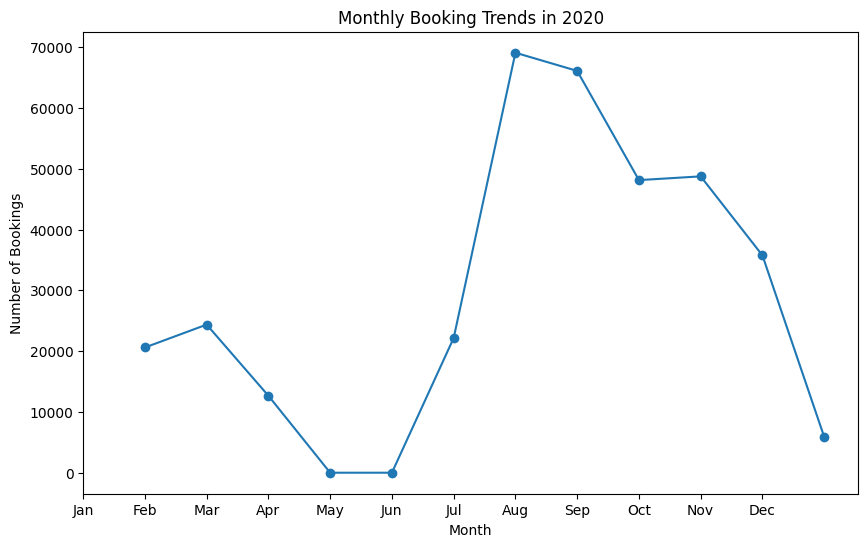

In [25]:
monthly_bookings = df['month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
monthly_bookings.plot(kind='line', marker='o')
plt.title('Monthly Booking Trends in 2020')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


In [26]:
df['day_of_week'] = df['ArrivalDate'].dt.dayofweek  # 0 = Monday, 6 = Sunday
weekend_bookings = df[df['day_of_week'] >= 5]  # Weekends are 5 and 6
weekday_bookings = df[df['day_of_week'] < 5]    # Weekdays are 0-4
print(f"Weekend Bookings: {len(weekend_bookings)}")
print(f"Weekday Bookings: {len(weekday_bookings)}")


Weekend Bookings: 102474
Weekday Bookings: 251102


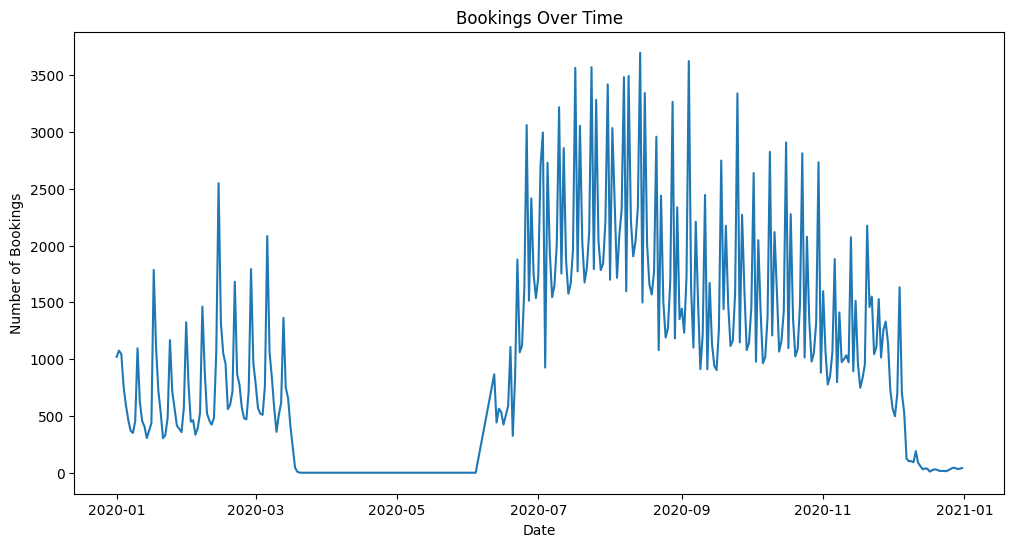

In [28]:
bookings_per_day = df.groupby(df['ArrivalDate'].dt.date).size()
bookings_per_day.plot(figsize=(12, 6))
plt.title('Bookings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.show()


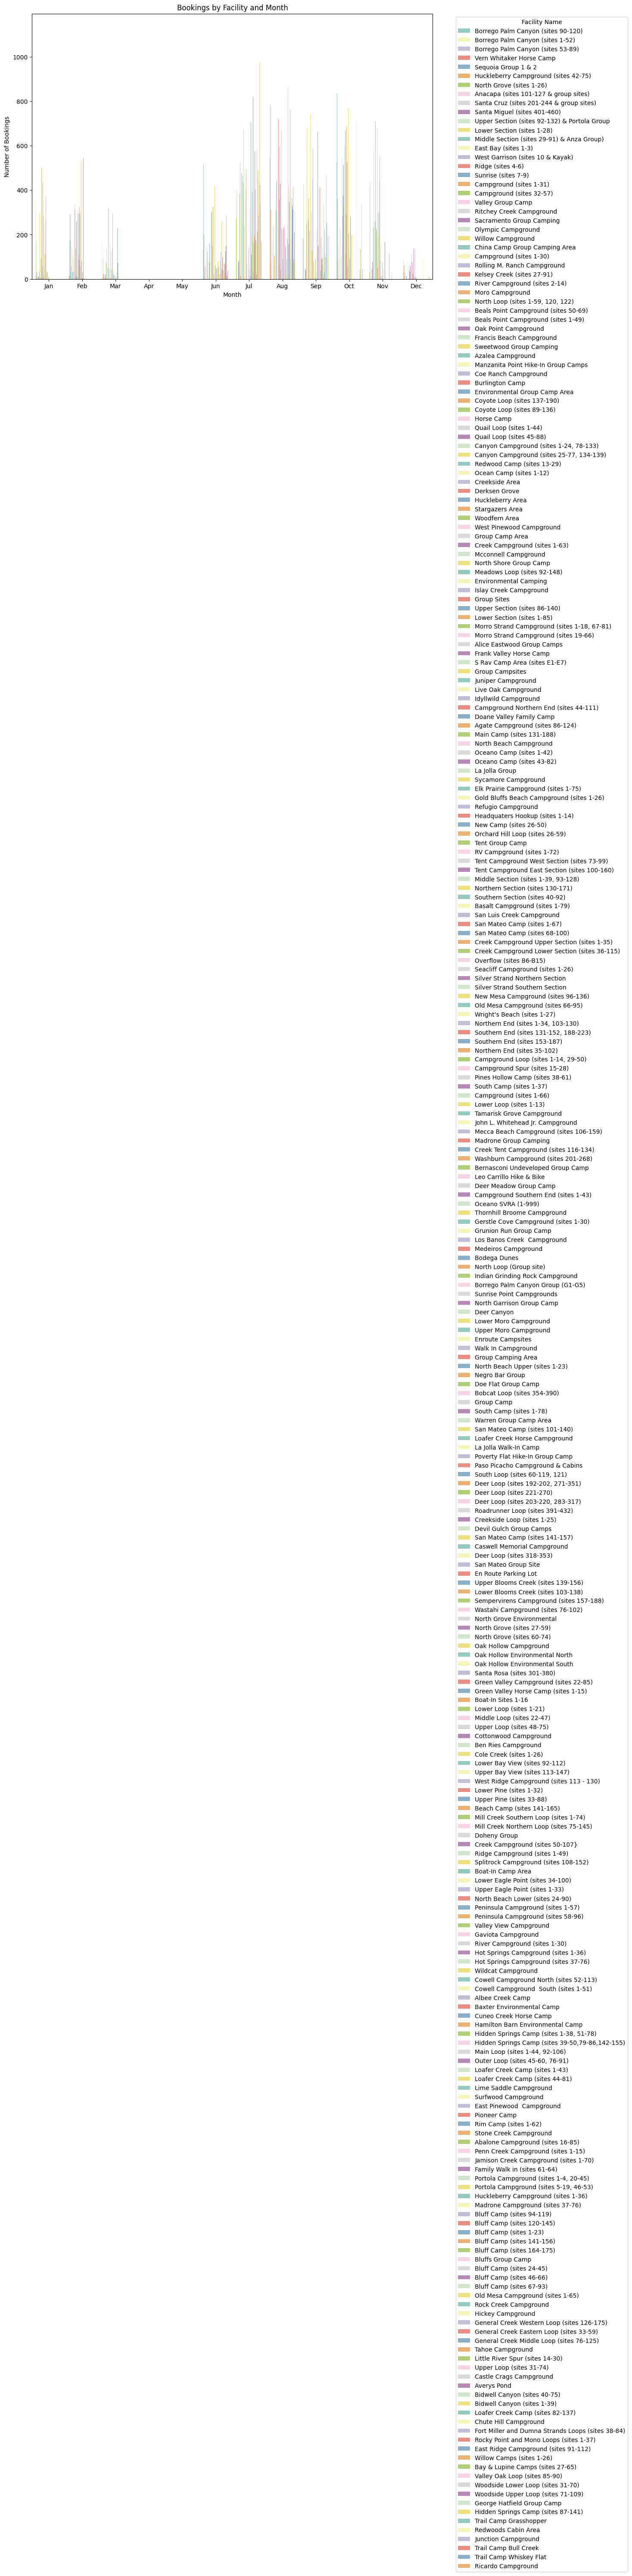

In [29]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='month', hue='FacilityName', palette='Set3')
plt.title('Bookings by Facility and Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Facility Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
